# Predicting the sale price of Bulldozers

The goal of this project is to predicting the sales price of Bulldozers..

# Problem Definition

> How well can we predict the future sale price of bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?  

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime

In [2]:
df = pd.read_csv("TrainAndValid.csv",low_memory = False)

In [4]:
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
#checking for the missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

# Parsing Dates

In [7]:
bull_df = pd.read_csv("TrainAndValid.csv",parse_dates = ["saledate"])
bull_df

/home/robin/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [21]:
bull_df["saledate"]

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

# Sorting DataFrame by saledate

**we are working with time series data..so sorting the dates is a good idea**



In [24]:
# Sorting Dataframe in Datetime order

bull_df.sort_values(by = ["saledate"], inplace = True,ascending = True)

In [26]:
bull_df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

# Making a Copy of original DataFrame

In [27]:
bull_cpy = bull_df.copy()

# Add datetime parameters for saledate column

In [28]:
bull_cpy["saleYear"] = bull_cpy.saledate.dt.year
bull_cpy["saleMonth"] = bull_cpy.saledate.dt.month
bull_cpy["saleDay"] = bull_cpy.saledate.dt.day
bull_cpy["saleDayofWeek"] = bull_cpy.saledate.dt.dayofweek
bull_cpy["saleDayofYear"] = bull_cpy.saledate.dt.dayofyear

In [30]:
bull_cpy.columns


Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleYear',
       'saleMonth', 'saleDay', 'saleDayofWeek', 'saleDayofYear'],

In [31]:
# we dont need the saledate column

bull_cpy.drop("saledate",axis = 1, inplace = True)

# Convert String to Category

In [32]:
pd.api.types.is_string_dtype(bull_cpy["Blade_Type"])

True

In [33]:
pd.api.types.is_string_dtype(bull_cpy["Hydraulics"])

True

In [34]:
# Find the columns which contains string dtype

for label,content in bull_cpy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
# This will turn all of the string value into category values

for label, content in bull_cpy.items():
    if pd.api.types.is_string_dtype(content):
        bull_cpy[label] = content.astype("category").cat.as_ordered()

In [36]:
bull_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [37]:
bull_cpy.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [38]:
bull_cpy.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [39]:
bull_cpy.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [40]:
# check the missing value

bull_cpy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [41]:
#find the ratio of missing values 

bull_cpy.isna().sum()/len(bull_cpy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

**We can see some column data are fully missing**

# Save Preprocessed Data

In [42]:
# Export current bull_cpy dataframe
 
bull_cpy.to_csv("Train_tmp.csv", index = False)

In [3]:
# import Preprocessed Data
bull_cpy = pd.read_csv("Train_tmp.csv", low_memory = False)

# Fill Missing Values

In [4]:
#Fill Numerical missing value first

for label, content in bull_cpy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [5]:
# check for which numeric column have null value

for label, content in bull_cpy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


**These two column have null values**

In [6]:
# fill numeric rows with Median

for label, content in bull_cpy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #add a binary col which tells us if the data was missing
            bull_cpy[label + "_is_missing"] = pd.isnull(content)
            
            #fill missing numeric value with median
            bull_cpy[label] = content.fillna(content.median())

In [7]:
# Check if there's any null numeric values

for label, content in bull_cpy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        else:
            print(label +" has No null numeric values")

SalesID has No null numeric values
SalePrice has No null numeric values
MachineID has No null numeric values
ModelID has No null numeric values
datasource has No null numeric values
auctioneerID has No null numeric values
YearMade has No null numeric values
MachineHoursCurrentMeter has No null numeric values
saleYear has No null numeric values
saleMonth has No null numeric values
saleDay has No null numeric values
saleDayofWeek has No null numeric values
saleDayofYear has No null numeric values
auctioneerID_is_missing has No null numeric values
MachineHoursCurrentMeter_is_missing has No null numeric values


In [8]:
# Check how many  examples were missing 

bull_cpy.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [9]:
# check which column have categorical data

for label,content in bull_cpy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [10]:
# Trun categorical variables into numbers and fill missing
for label, content in bull_cpy.items():
    if not pd.api.types.is_numeric_dtype(content):
        #add binary col to indicate wheater sample had missing values
        bull_cpy[label + "_is_missing"] = pd.isnull(content)
        
        #turn categories into number and add +1
        bull_cpy[label] = pd.Categorical(content).codes + 1

In [11]:
bull_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(5), int64(10), int8(39)
memory usage: 78.3 MB


In [12]:
bull_cpy.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [11]:
bull_cpy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

**We have converted data into numeric and our dataframe has no missing value..so we are good to go for modeling**

# Modeling

In [13]:
from sklearn.ensemble import RandomForestRegressor

#Instantiate model
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 15)

#Fit the model
model.fit(bull_cpy.drop("SalePrice", axis = 1), bull_cpy["SalePrice"])

RandomForestRegressor(n_jobs=-1, random_state=15)

In [23]:
# Score the model

model.score(bull_cpy.drop("SalePrice", axis = 1),bull_cpy["SalePrice"])

0.9876176526692111

**Above model evaluation score is not fully reliable**

# Spliting the data

In [15]:
bull_cpy.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [16]:
bull_cpy.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [17]:
# Spliting data into training and testing set

bull_val = bull_cpy[bull_cpy.saleYear == 2012]
bull_train = bull_cpy[bull_cpy.saleYear != 2012]

In [18]:
print("Length of validation data : ", len(bull_val))
print("Length of training data : ", len(bull_train))

Length of validation data :  11573
Length of training data :  401125


In [19]:
# Split data into X & Y

X_train, y_train = bull_train.drop("SalePrice", axis = 1),bull_train.SalePrice

X_valid, y_valid = bull_val.drop("SalePrice",axis = 1),bull_val.SalePrice

In [39]:
print("X_train Shape : ",X_train.shape)
print("Y train Shape : ",y_train.shape)
print("X_valid Shape : ",X_valid.shape)
print("Y_valid Shape : ",y_valid.shape)

X_train Shape :  (401125, 102)
Y train Shape :  (401125,)
X_valid Shape :  (11573, 102)
Y_valid Shape :  (11573,)


# Creating Custom evaluation Function

**In this project we are gonna evaluate our model based on ROOT Mean Squared Log Error**

In [40]:
#creating evaluation function(rmsle)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

In [41]:
def rmsle(y_test,y_preds):
    
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#create function to evaluate model on a few different level

def show_scores(model):
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    
    scores = {"Training MAE":mean_absolute_error(y_train,train_preds),
              "Validation MAE":mean_absolute_error(y_valid,val_preds),
              "Training RMSLE":rmsle(y_train,train_preds),
              "Validation RMSLE":rmsle(y_valid, val_preds),
              "Training R^2":r2_score(y_train, train_preds),
              "Validation R^2":r2_score(y_valid, val_preds)}
    return scores

# Testing our model on a small subset

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
len(X_train)

401125

In [23]:
#Changing max samples 

model = RandomForestRegressor(n_jobs = -1,
                              max_samples = 30000,
                              random_state = 16)

In [24]:
%%time

model.fit(X_train, y_train)

CPU times: user 2min 58s, sys: 2.06 s, total: 3min
Wall time: 58 s


RandomForestRegressor(max_samples=30000, n_jobs=-1, random_state=16)

In [28]:
show_scores(model)

{'Training MAE': 4722.592492614522,
 'Validation MAE': 6540.845171519917,
 'Training RMSLE': 0.22374076534456785,
 'Validation RMSLE': 0.270280263924408,
 'Training R^2': 0.8971024749714283,
 'Validation R^2': 0.8592588156364382}

# Hyperparameter Tuning with RandomizedCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,8],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,1),
           "max_features":[0.5,1,"sqrt", "auto"],
           "max_samples":[20000]}

# Instantiate RandomizedSearchCV model

ran_cv = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                  random_state = 16),
                            param_distributions = rf_grid,
                            n_iter = 3,
                            cv = 5,
                            verbose = True)

ran_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=16),
                   n_iter=3,
                   param_distributions={'max_depth': [None, 3, 5, 8],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [31]:
#find the best model hyperparameter

ran_cv.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'max_samples': 20000,
 'max_features': 'sqrt',
 'max_depth': 8}

In [32]:
#evaluate model

show_scores(ran_cv)

{'Training MAE': 9964.563225526443,
 'Validation MAE': 11495.244683125355,
 'Training RMSLE': 0.4348126229787238,
 'Validation RMSLE': 0.4499910420556928,
 'Training R^2': 0.6165984688046025,
 'Validation R^2': 0.6244965303968826}

In [33]:
tune_model = RandomForestRegressor(n_jobs = -1,
                                   n_estimators = 60,
                                   min_samples_split = 2,
                                   min_samples_leaf = 15,
                                   max_samples = 20000,
                                   max_features = "sqrt",
                                   max_depth = 8)

tune_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features='sqrt', max_samples=20000,
                      min_samples_leaf=15, n_estimators=60, n_jobs=-1)

In [34]:
show_scores(tune_model)

{'Training MAE': 9770.471018449858,
 'Validation MAE': 11265.679101772306,
 'Training RMSLE': 0.4271136446810609,
 'Validation RMSLE': 0.4427979522054713,
 'Training R^2': 0.6303635293913332,
 'Validation R^2': 0.6399230118767267}

# Training The model with best hyperparameter

In [20]:
final_model = RandomForestRegressor(n_jobs = -1,
                                    n_estimators = 40,
                                    min_samples_split = 14,
                                    min_samples_leaf = 1,
                                    max_samples = None,
                                    max_features = 0.5,
                                    random_state = 16)


#Fit the Final model
final_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=16)

In [48]:
#score for final model

show_scores(final_model)

{'Training MAE': 2950.1886752610235,
 'Validation MAE': 5941.52562466434,
 'Training RMSLE': 0.1444509676197296,
 'Validation RMSLE': 0.2452833505953281,
 'Training R^2': 0.9589761832914397,
 'Validation R^2': 0.8827276032213306}

# Test the model on TEST Dataset

In [22]:
bull_test = pd.read_csv("Test.csv",parse_dates = ["saledate"])
bull_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [23]:
bull_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

**Our test dataset also contain missing values and all the data are not in numeric dtype..we need preprocess test dataset as Train and Valid dataset**

# Preprocessing the test dataset in the same format as trin dataset

In [24]:
def preprocess_data(ds):
    
    ds["saleYear"] = ds.saledate.dt.year
    ds["saleMonth"] = ds.saledate.dt.month
    ds["saleDay"] = ds.saledate.dt.day
    ds["saleDayofWeek"] = ds.saledate.dt.dayofweek
    ds["saleDayofYear"] = ds.saledate.dt.dayofyear
    
    ds.drop("saledate",axis = 1, inplace = True)
    
    #fill the numeric missing rows with median
    for label,content in ds.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #add a binary col which tell if the data was missing or not
                ds[label +"_is_missing"] = pd.isnull(content)
                
                #fill missing numeric value with median
                ds[label] = content.fillna(content.median())
                
        #filled the category missing data and turn categories into numeric value
        if not pd.api.types.is_numeric_dtype(content):
            ds[label+"_is_missing"] = pd.isnull(content)
            ds[label] = pd.Categorical(content).codes +1

    return ds

In [25]:
#process the test data

bull_test = preprocess_data(bull_test)
bull_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [44]:
#check col difference between train and test dataset

set(X_train.columns) - set(bull_test.columns)

{'auctioneerID_is_missing'}

In [45]:
bull_test["auctioneerID_is_missing"] = False
len(bull_test.columns)

102

In [49]:
#Make prediction on Test Data

test_preds = final_model.predict(bull_test)

In [50]:
test_preds

array([20126.73984164, 22801.72216674, 49498.07445197, ...,
       13839.23634253, 20097.58299197, 28988.9045748 ])

In [51]:
#Formatting test prediction

bull_preds = pd.DataFrame()
bull_preds["SalesID"] = bull_test["SalesID"]
bull_preds["SalesPrice"] = test_preds
bull_preds

,SalesID,SalesPrice
0,1227829,20126.739842
1,1227844,22801.722167
2,1227847,49498.074452
3,1227848,58647.478323
4,1227863,41464.421595
...,...,...
12452,6643171,45918.484775
12453,6643173,19204.810124
12454,6643184,13839.236343
12455,6643186,20097.582992


In [52]:
# Export Prediction data

bull_preds.to_csv("Bull_test_prediction.csv", index = False)

# Feature Importance

In [46]:
#find the best 20 features 

def features_plot(columns,importance, n = 20):
    
    df = (pd.DataFrame({"Features":columns,"Features_importance":importance})
          .sort_values("Features_importance",ascending = False)
          .reset_index(drop = True))
    
    #plot the DataFrame
    fig,ax = plt.subplots(figsize = (10,10))
    ax.barh(df["Features"][:n], df["Features_importance"][:n])
    ax.set_ylabel("Features",fontsize = 16)
    ax.set_xlabel("Features Importance", fontsize = 16)
    ax.invert_yaxis()

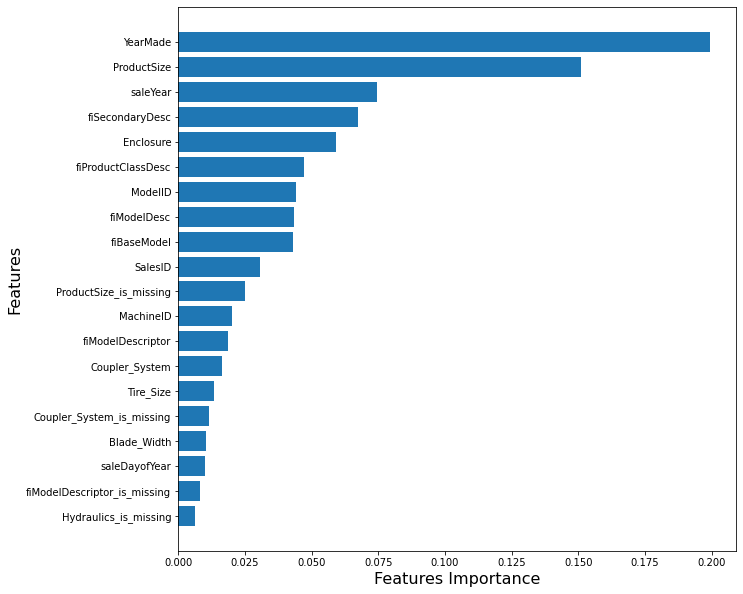

In [47]:
features_plot(X_train.columns,final_model.feature_importances_)